In [4]:
import pandas as pd

In [5]:
'''
Data    |   ks statistic    |   p value
1       |    KS Statistic : 0.14 | P-value: 0.25
2       |    KS statistic : 0.16 | P-value: 0.14
3       |   0.16                 | 0.14
4       |  0.15                  | 0.2
5       | 0.17                   | 0.09
6       | 0.13                   | 0.26
7       |  0.14                  | p valu 0.14
8       | 0.11                   | 0.34


'''

'\nData    |   ks statistic    |   p value\n1       |    KS Statistic : 0.14 | P-value: 0.25\n2       |    KS statistic : 0.16 | P-value: 0.14\n3       |   0.16                 | 0.14\n4       |  0.15                  | 0.2\n5       | 0.17                   | 0.09\n6       | 0.13                   | 0.26\n7       |  0.14                  | p valu 0.14\n8       | 0.11                   | 0.34\n\n\n'

In [6]:
[11,10 ,14 ,15 ,12 ,8 ,5 ,9 ,6 ,3 ,2 ,5 ,8 ,5 ,7 ,4 ,11 ,10 ,17 ,18 ,20 ,24 ,41 ,59 ,60 ,122 ,159 ,196 ,222 ,218 ,252 ,256 ,217 ,185 ,163 ,139 ,133 ,120 ,104 ,74 ,75 ,50 ,59 ,60 ,65 ,87 ,74 ,89 ,143,139 ,133 ,122 ,104 ,74 ,75 ,50 ,59 ,60 ,85 ,89 ,99 ,90 ,98 ,87 ,74,103,111,104,105,122,120,104,85 ,86 ,60 ,69 ,60 ,41 ,42 ,45 ,50 ,54 ,41 ,42 ,28 ,24 ,21 ,22 ,20 ,24 ,21 ,14 ,16 ,13 ,9 ,11]

[11,
 10,
 14,
 15,
 12,
 8,
 5,
 9,
 6,
 3,
 2,
 5,
 8,
 5,
 7,
 4,
 11,
 10,
 17,
 18,
 20,
 24,
 41,
 59,
 60,
 122,
 159,
 196,
 222,
 218,
 252,
 256,
 217,
 185,
 163,
 139,
 133,
 120,
 104,
 74,
 75,
 50,
 59,
 60,
 65,
 87,
 74,
 89,
 143,
 139,
 133,
 122,
 104,
 74,
 75,
 50,
 59,
 60,
 85,
 89,
 99,
 90,
 98,
 87,
 74,
 103,
 111,
 104,
 105,
 122,
 120,
 104,
 85,
 86,
 60,
 69,
 60,
 41,
 42,
 45,
 50,
 54,
 41,
 42,
 28,
 24,
 21,
 22,
 20,
 24,
 21,
 14,
 16,
 13,
 9,
 11]

In [7]:
df = pd.read_csv("/home/local/ASURITE/speddira/dev/traffic_sense_net/city_scale/raw_datasets/tempe_no_incident_trafficDataset_2024-3-29_1112hours_86400steps.csv")

In [8]:
df.head()

,step,time_of_day,identified_edge,junction_mean_speed,traffic_count,traffic_occupancy,vehicles_per_lane_1,vehicles_per_lane_0,lane_mean_speed_0,lane_mean_speed_1,incident_edge,incident_start_time,incident_type,accident_label,accident_id,accident_duration,incident_lane
0,0,0,533573776#0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,False,NaN,0,-1
1,0,0,436794680#0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,False,NaN,0,-1
2,0,0,256917837#0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,False,NaN,0,-1
3,0,0,436791498#0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,False,NaN,0,-1
4,0,0,436794701#0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,False,NaN,0,-1


In [9]:
df_day1 = df[df["step"]<86400]

df_day2 = df[(df["step"]>86400) & (df["step"]<172800)]

df_day3 = df[df["step"]>172800]

In [10]:
df_day1_mill = df_day1[df_day1["identified_edge"] == "533573776#0"][["step","time_of_day","traffic_count"]]

df_day2_mill = df_day2[df_day2["identified_edge"] == "533573776#0"][["step","time_of_day","traffic_count"]]

df_day3_mill = df_day3[df_day3["identified_edge"] == "533573776#0"][["step","time_of_day","traffic_count"]]

In [11]:
df_day1_mill['rolling_sum'] = df_day1_mill['traffic_count'].rolling(window=900, min_periods=1).sum()

df_day2_mill['rolling_sum'] = df_day2_mill['traffic_count'].rolling(window=900, min_periods=1).sum()

df_day3_mill['rolling_sum'] = df_day3_mill['traffic_count'].rolling(window=900, min_periods=1).sum()

# Downsample to apply the stride of 900 steps
# Here we add 899 to start from the last row of the first complete window
# strided_rolling_sum = rolling_sum.iloc[899::900].reset_index(drop=True)

In [12]:
df_day1_mill.head(200)

,step,time_of_day,traffic_count,rolling_sum
0,0,0,0,0.0
64,1,1,0,0.0
128,2,2,0,0.0
192,3,3,0,0.0
256,4,4,0,0.0
...,...,...,...,...
12480,195,195,0,10.0
12544,196,196,0,10.0
12608,197,197,0,10.0
12672,198,198,0,10.0


In [13]:
df_day1_mill_15min = df_day1_mill.iloc[899::900]

df_day2_mill_15min = df_day2_mill.iloc[899::900]

df_day3_mill_15min = df_day3_mill.iloc[899::900]

In [14]:
df_day1_mill_15min.head()

,step,time_of_day,traffic_count,rolling_sum
57536,899,899,0,173.0
115136,1799,1799,0,248.0
172736,2699,2699,0,227.0
230336,3599,3599,0,263.0
287936,4499,4499,0,219.0


<Axes: xlabel='time_of_day'>

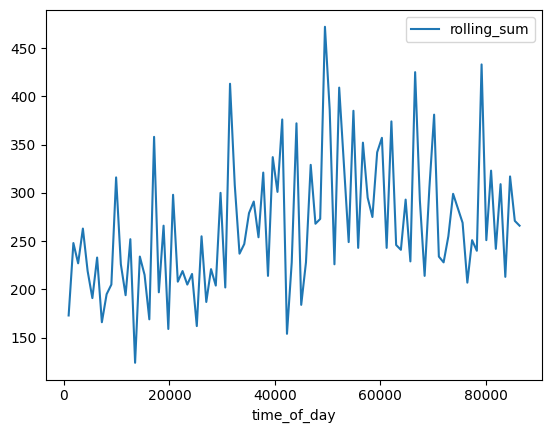

In [15]:
df_day1_mill_15min.plot(x="time_of_day",y="rolling_sum")

In [16]:
real_traffic = [11,10 ,14 ,15 ,12 ,8 ,5 ,9 ,6 ,3 ,2 ,5 ,8 ,5 ,7 ,4 ,11 ,10 ,17 ,18 ,20 ,24 ,41 ,59 ,60 ,122 ,159 ,196 ,222 ,218 ,252 ,256 ,217 ,185 ,163 ,139 ,133 ,120 ,104 ,74 ,75 ,50 ,59 ,60 ,65 ,87 ,74 ,89 ,143,139 ,133 ,122 ,104 ,74 ,75 ,50 ,59 ,60 ,85 ,89 ,99 ,90 ,98 ,87 ,74,103,111,104,105,122,120,104,85 ,86 ,60 ,69 ,60 ,41 ,42 ,45 ,50 ,54 ,41 ,42 ,28 ,24 ,21 ,22 ,20 ,24 ,21 ,14 ,16 ,13 ,9 ,11]

In [17]:
len(real_traffic)

96

In [18]:
simulated_traffic = df_day1_mill_15min["rolling_sum"].to_list()

In [19]:
len(simulated_traffic)

96

In [20]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [21]:
mae = np.mean(np.abs(np.array(real_traffic) - np.array(simulated_traffic)))
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 199.17708333333334


In [22]:
hours = [(i+15)/60 for i in range(0,1440,15)]

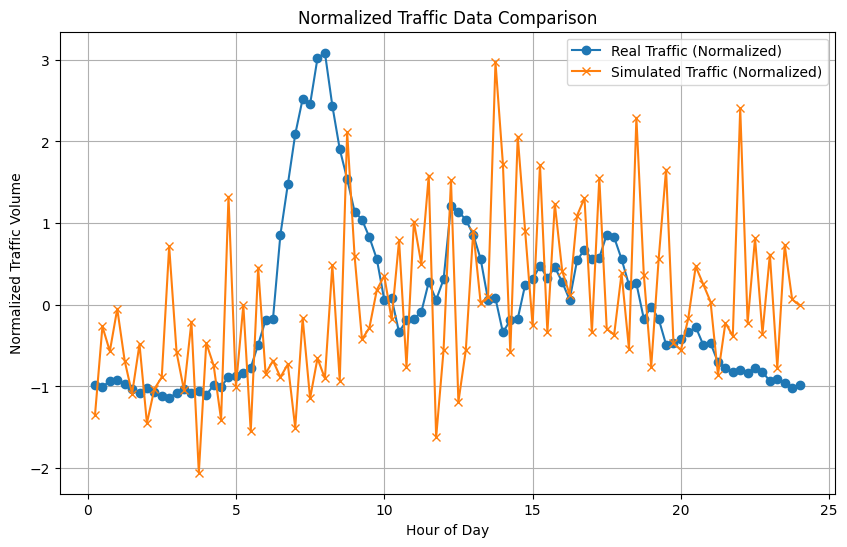

KS Statistic : 0.13541666666666666, P-value: 0.34359375969646605
Mean Absolute Error (MAE) on : 1.0172066897824756


In [23]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming 'real_traffic' and 'simulated_traffic' are your datasets

def normalize_data(data):
    mu = np.mean(data)
    sigma = np.std(data)
    return (data - mu) / sigma

# Normalize both datasets
real_traffic_normalized = normalize_data(np.array(real_traffic))
simulated_traffic_normalized = normalize_data(np.array(simulated_traffic))

# Visualization after normalization
plt.figure(figsize=(10, 6))
# hours = range(1, 25)
plt.plot(hours, real_traffic_normalized, label='Real Traffic (Normalized)', marker='o')
plt.plot(hours, simulated_traffic_normalized, label='Simulated Traffic (Normalized)', marker='x')
plt.title('Normalized Traffic Data Comparison')
plt.xlabel('Hour of Day')
plt.ylabel('Normalized Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

# Repeating Kolmogorov-Smirnov Test with normalized data
ks_stat, ks_p_value = stats.ks_2samp(real_traffic_normalized, simulated_traffic_normalized)
print(f"KS Statistic : {ks_stat}, P-value: {ks_p_value}")

# Calculating Mean Absolute Error (MAE) on normalized data
mae_normalized = np.mean(np.abs(real_traffic_normalized - simulated_traffic_normalized))
print(f"Mean Absolute Error (MAE) on : {mae_normalized}")


In [24]:
 # Replace with your actual data

# Number of bootstrap samples
n_bootstrap = 1000
ks_statistics = []

# Perform bootstrapping
for _ in range(n_bootstrap):
    # Resample with replacement
    real_bootstrap = np.random.choice(real_traffic_normalized, size=len(real_traffic_normalized), replace=True)
    simulated_bootstrap = np.random.choice(simulated_traffic_normalized, size=len(simulated_traffic_normalized), replace=True)
    
    # Calculate KS statistic for the bootstrap sample
    ks_stat, _ = stats.ks_2samp(real_bootstrap, simulated_bootstrap)
    ks_statistics.append(ks_stat)

# Calculate the confidence interval
confidence_interval = np.percentile(ks_statistics, [2.5, 97.5])

# Calculate KS statistic for the original data
ks_stat, ks_p_value = stats.ks_2samp(real_traffic_normalized, simulated_traffic_normalized)

print(f"KS Statistic: {ks_stat}")
print(f"KS p-value: {ks_p_value}")
print(f"95% Confidence Interval for the KS Statistic: {confidence_interval}")

KS Statistic: 0.13541666666666666
KS p-value: 0.34359375969646605
95% Confidence Interval for the KS Statistic: [0.10416667 0.27083333]


In [25]:
from scipy.stats import entropy


# Note: KL Divergence requires probability distributions (summing to 1)
# Normalize your lists if they aren't already probability distributions.

kl_div = entropy(real_traffic_normalized, simulated_traffic_normalized)  
print(kl_div)


inf


In [29]:
from scipy.spatial.distance import jensenshannon

# Example distributions
P = np.array([0.1, 0.4, 0.5])
Q = np.array([0.2, 0.3, 0.5])

# Jensen-Shannon Divergence
js_divergence = jensenshannon(real_traffic_normalized, simulated_traffic_normalized)
print(f"Jensen-Shannon Divergence: {js_divergence}")


Jensen-Shannon Divergence: inf


In [27]:
!pip install pymc3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.3 MB/s eta 0:00:00 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of arviz to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of arviz to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of pandas to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pandas to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of xarray to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of xarray-einstats to determine which version is compatible with other requirements. This could 

In [28]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt


# Bayesian model
with pm.Model() as model:
    # Priors for means and standard deviations
    mu_real = pm.Normal('mu_real', mu=0, sigma=1)
    mu_sim = pm.Normal('mu_sim', mu=0, sigma=1)
    sigma_real = pm.HalfNormal('sigma_real', sigma=1)
    sigma_sim = pm.HalfNormal('sigma_sim', sigma=1)

    # Likelihood
    real = pm.Normal('real', mu=mu_real, sigma=sigma_real, observed=real_traffic_normalized)
    sim = pm.Normal('sim', mu=mu_sim, sigma=sigma_sim, observed=simulated_traffic_normalized)

    # Inference
    trace = pm.sample(1000, return_inferencedata=False)

# Posterior distributions
pm.plot_posterior(trace, var_names=['mu_real', 'mu_sim'])
plt.show()

# Credible interval for the difference in means
difference = trace['mu_real'] - trace['mu_sim']
credible_interval = np.percentile(difference, [2.5, 97.5])
print(f"95% credible interval for the difference in means: {credible_interval}")


/home/local/ASURITE/speddira/miniconda3/envs/cobra/lib/python3.10/site-packages/theano/scalar/basic.py:2412: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  self.ctor = getattr(np, o_type.dtype)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [21]:
x = np.sort(real_traffic_normalized)

In [22]:
x2 =np.sort(simulated_traffic_normalized)

In [23]:
x

array([-1.48927506, -1.48927506, -1.48927506, -1.4424241 , -1.42368371,
       -1.41431352, -1.40494332, -1.40494332, -1.38620294, -1.36746255,
       -1.36746255, -1.34872216, -1.32998178, -1.3018712 , -1.28313081,
       -1.27376062, -1.27376062, -1.24565004, -1.19879908, -1.18005869,
       -1.13320772, -1.12383753, -1.11446734, -1.05824618, -0.97391444,
       -0.91769328, -0.8989529 , -0.87084232, -0.80525097, -0.7584    ,
       -0.73965962, -0.58036633, -0.52414517, -0.51477498, -0.50540479,
       -0.50540479, -0.40233266, -0.3554817 , -0.30863073, -0.28052015,
       -0.27114996, -0.25240958, -0.16807784, -0.15870765, -0.12122687,
       -0.01815475,  0.0474366 ,  0.07554718,  0.12239815,  0.20672988,
        0.20672988,  0.23484046,  0.30980201,  0.3191722 ,  0.37539336,
        0.40350394,  0.43161452,  0.48783568,  0.53468664,  0.54405684,
        0.55342703,  0.58153761,  0.5909078 ,  0.62838857,  0.67523954,
        0.67523954,  0.69397992,  0.7220905 ,  0.7314607 ,  0.79

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Provided list of numbers
numbers = np.array([-1.48927506, -1.48927506, -1.48927506, -1.4424241, -1.42368371,
                    -1.41431352, -1.40494332, -1.40494332, -1.38620294, -1.36746255,
                    -1.36746255, -1.34872216, -1.32998178, -1.3018712, -1.28313081,
                    -1.27376062, -1.27376062, -1.24565004, -1.19879908, -1.18005869,
                    -1.13320772, -1.12383753, -1.11446734, -1.05824618, -0.97391444,
                    -0.91769328, -0.8989529, -0.87084232, -0.80525097, -0.7584,
                    -0.73965962, -0.58036633, -0.52414517, -0.51477498, -0.50540479,
                    -0.50540479, -0.40233266, -0.3554817, -0.30863073, -0.28052015,
                    -0.27114996, -0.25240958, -0.16807784, -0.15870765, -0.12122687,
                    -0.01815475, 0.0474366, 0.07554718, 0.12239815, 0.20672988,
                    0.20672988, 0.23484046, 0.30980201, 0.3191722, 0.37539336,
                    0.40350394, 0.43161452, 0.48783568, 0.53468664, 0.54405684,
                    0.55342703, 0.58153761, 0.5909078, 0.62838857, 0.67523954,
                    0.67523954, 0.69397992, 0.7220905, 0.7314607, 0.79705205,
                    0.83453282, 0.85327321, 0.8626434, 0.88138379, 0.90012417,
                    0.91886456, 0.92823475, 0.95634533, 0.96571552, 1.03130687,
                    1.05004726, 1.08752803, 1.08752803, 1.19060016, 1.22808093,
                    1.24682132, 1.27493189, 1.29367228, 1.32178286, 1.3967444,
                    1.54666749, 1.59351846, 1.60288865, 1.68722039, 1.86525406,
                    1.92147522])

# Calculate the sorted numbers and cumulative probabilities
sorted_numbers = np.sort(numbers)
cumulative_probs = np.arange(1, len(numbers) + 1) / len(numbers)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


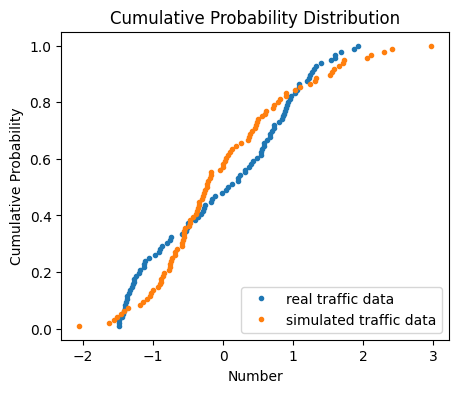

In [25]:
# Plot the cumulative probability distribution
plt.figure(figsize=(5, 4))
plt.plot(sorted_numbers, cumulative_probs, marker='.', linestyle='none')
plt.plot(x2, cumulative_probs, marker='.', linestyle='none')
plt.legend()
plt.title('Cumulative Probability Distribution')
plt.xlabel('Number')
plt.ylabel('Cumulative Probability')
plt.legend(["real traffic data", "simulated traffic data"], loc="lower right")
plt.grid(False)
plt.savefig("cumulative_probs.png")
plt.show()


In [26]:
# defining the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline 

# No of data points used 

# sort the data in ascending order 
x = np.sort(real_traffic_normalized) 

# get the cdf values of y 
y = np.arange(N) / float(N) 

# plotting 
plt.xlabel('x-axis') 
plt.ylabel('y-axis') 

plt.title('CDF using sorting the data') 

plt.plot(x, y, marker='o') 


NameError: name 'N' is not defined